# Logistic Regression Part II: Decision Boundaries and Imbalanced Classes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


import statsmodels.api as sm
from scipy import stats
from statsmodels.discrete.discrete_model import Logit

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer, load_digits, load_iris, make_blobs, make_circles

In [10]:
X, y = make_blobs(n_samples = 20, centers = 2, random_state = 22)

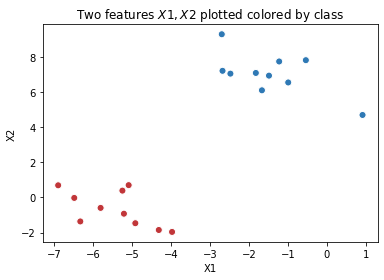

In [11]:
plt.scatter(X[:, 0], X[:, 1], c = y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Two features $X1, X2$ plotted colored by class');

In [12]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [13]:
#adapted from https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
xx, yy = np.mgrid[X.min():X.max():.01, X.min():X.max():.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

Text(0, 0.5, 'X2')

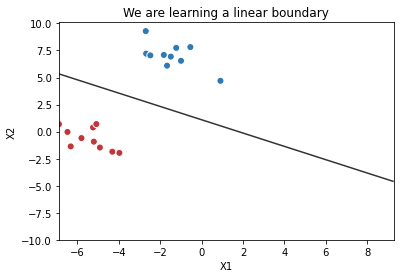

In [14]:
f, ax = plt.subplots()
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set_ylim(-10);
ax.set_title('We are learning a linear boundary');
ax.set_xlabel('X1')
ax.set_ylabel('X2')

### What if ...

In [15]:
X, y = make_circles(n_samples=50, noise = .2, factor = 0.2, random_state = 24)

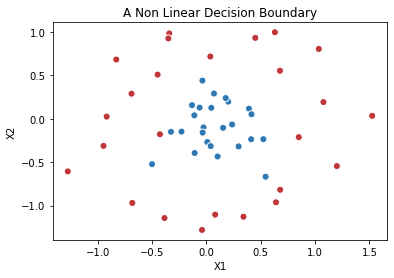

In [16]:
plt.scatter(X[:, 0], X[:, 1], c = y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('A Non Linear Decision Boundary');

In [9]:
poly = PolynomialFeatures()
Xpoly = poly.fit_transform(X)
clf = LogisticRegression()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Xpoly, y, random_state = 24)

In [11]:
clf.fit(X_train, y_train)

LogisticRegression()

In [12]:
clf.score(X_train, y_train)

0.918918918918919

In [13]:
clf.score(X_test, y_test)

0.9230769230769231

In [14]:
cross_val_score(clf, X_train, y_train)

array([0.625     , 1.        , 0.85714286, 1.        , 0.85714286])

### We can still use regularization here -- in fact it is default with `sklearn`

In [15]:
#create polynomial features
poly = PolynomialFeatures()
Xpoly = poly.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(Xpoly, y, random_state = 22)

In [17]:
#scale the features
sscaler = StandardScaler()
Xtrainscaled = sscaler.fit_transform(X_train)
Xtestscaled = sscaler.transform(X_test)

In [18]:
clf_2 = LogisticRegression(C = 100.0)
clf_2.fit(Xtrainscaled, y_train)

LogisticRegression(C=100.0)

In [19]:
clf_2.score(Xtrainscaled, y_train)

1.0

In [20]:
clf_2.score(Xtestscaled, y_test)

0.8461538461538461

In [21]:
from sklearn.linear_model import LogisticRegressionCV

In [22]:
clf_cv = LogisticRegressionCV()

In [23]:
clf_cv.fit(Xtrainscaled, y_train)

LogisticRegressionCV()

In [24]:
clf.C

1.0

### Statsmodels has both a regularized and non-scaled approach

In [25]:
logit_no_regularization = sm.Logit(y, X).fit()
logit_with_regularization = sm.Logit(y, X).fit_regularized()

Optimization terminated successfully.
         Current function value: 0.692821
         Iterations 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6928211190854482
            Iterations: 7
            Function evaluations: 7
            Gradient evaluations: 7


In [26]:
logit_with_regularization.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                          Logit   Df Residuals:                       48
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:               0.0004704
Time:                        21:52:41   Log-Likelihood:                -34.641
converged:                       True   LL-Null:                       -34.657
Covariance Type:            nonrobust   LLR p-value:                    0.8567
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0227      0.496      0.046      0.964      -0.949       0.994
x2            -0.0860      0.489     -0.176      0.860      -1.045       0.873
==============================================================================
"""

In [27]:
logit_no_regularization.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                          Logit   Df Residuals:                       48
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:               0.0004704
Time:                        21:52:41   Log-Likelihood:                -34.641
converged:                       True   LL-Null:                       -34.657
Covariance Type:            nonrobust   LLR p-value:                    0.8567
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0227      0.496      0.046      0.964      -0.949       0.994
x2            -0.0860      0.489     -0.176      0.860      -1.045       0.873
==============================================================================
"""

### Imbalanced Classes

In [28]:
caravan = pd.read_csv('data/Caravan.csv')

In [29]:
caravan.head()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No


In [30]:
y = np.where(caravan.Purchase == 'No', 0, 1)

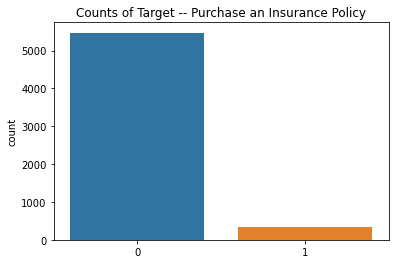

In [31]:
sns.countplot(y);
plt.title('Counts of Target -- Purchase an Insurance Policy');

In [32]:
clf = LogisticRegression(max_iter=1000)

In [33]:
X = caravan.drop('Purchase', axis = 1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [35]:
clf.fit(X_train, y_train)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [36]:
clf.score(X_test, y_test)

0.9416208791208791

In [37]:
pd.value_counts(y, normalize = True)

0    0.940227
1    0.059773
dtype: float64

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
preds = clf.predict(X_test)

In [40]:
confusion_matrix(y_test, preds)

array([[1370,    1],
       [  84,    1]])

### Instead, we can lower the threshold for classifying a positive class

In [41]:
probs = clf.predict_proba(X_test)[:, 1]

In [42]:
probs

array([0.00764011, 0.04092674, 0.02571775, ..., 0.06157181, 0.12056917,
       0.02067779])

In [50]:
preds2 = np.where(probs > 0.2, 1, 0)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test, preds2)

0.9148351648351648

In [53]:
confusion_matrix(y_test, preds2)

array([[1319,   52],
       [  72,   13]])

In [54]:
#misclassifications with default .5 probability
84/85

0.9882352941176471

In [55]:
#misclassifications with lower threshold
72/85

0.8470588235294118